In [1]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.fft import rfft, irfft

In [36]:
# el objeto aleatorio
N = 30
T = 2 * np.pi

t = np.linspace(0,T, N)
z = np.zeros(N)

spawn = lambda t: np.random.rand()

# y = np.random.rand() + np.sin(z)
omega = 2*np.pi / T
y =  np.exp(1j * omega * t)

In [37]:
# y_noise = [ np.sin(omega * x) + 0.5*spawn(1)    for x in t ]
# y = [ np.sin(omega * x)  for x in t ]
# y = [ np.exp(1j * omega * x) + 0.5*spawn(1)  for x in t ]

y = [ np.exp(1j * 10  *  omega * x) for x in t ]


y = np.array(y)

Text(0.5, 1.0, 'Onda sin Rudio, Sinusoidal')

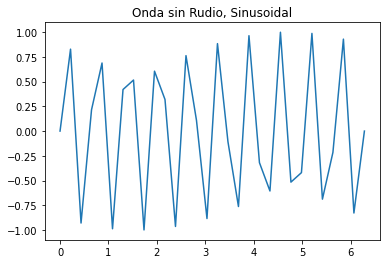

In [38]:
plt.plot(t,y.imag)
plt.title('Onda sin Rudio, Sinusoidal')

### analisis clasico
Obtenemos la distribucion de frecuencia en Hz

/usr/local/lib/python3.8/dist-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


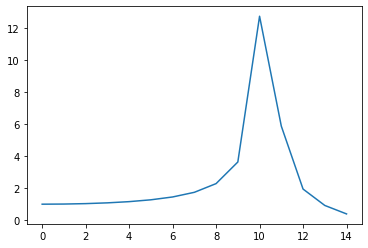

In [39]:
# fourier
ft = rfft(y)
freq = np.fft.rfftfreq(N) * N

limit = int(N/2)

plt.plot(  freq[:limit], abs(ft[:limit])  ) 

### componente aleatorio

In [40]:
yruido = np.array([ np.exp(1j *10* omega * x) + 1j*2*spawn(1)  for x in t ])

Text(0.5, 1.0, 'Onda con Rudio, Sinusoidal')

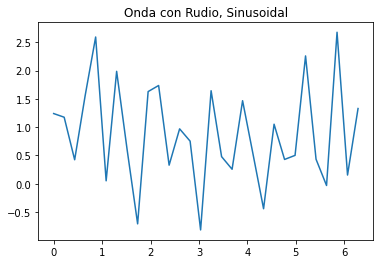

In [41]:
plt.plot(t,yruido.imag)
plt.title('Onda con Rudio, Sinusoidal')

/usr/local/lib/python3.8/dist-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)


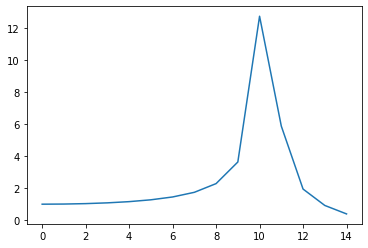

In [42]:
# aun con una cantidad de ruido es capaz de extraer los componentes

# fourier
ft = rfft(yruido)
freq = np.fft.rfftfreq(N) * N

limit = int(N/2)
# limit = N

plt.plot(  freq[:limit], abs(ft[:limit])  ) 

$$
Y(t) = \sum Z_n \phi_n(t)
$$

en $Z_n$ estan los componentes aleatorios, mientras que la dependencia del tiempo se almacena sobre una función con variable en el tiempo la cual no es aleatoria y se consigue con la matriz de covarianza

Sea el rudio gaussiano, Y sera gaussiana, entonces tambien Z


In [130]:
import numpy as np

def KLT(a):
    '''
    retorna 
    - el producto punto entre el vector entrada y el autovector, 
    - el autovector de la matriz de covarianza de a
    - el autovalor de la matriz de covarianza de a
    '''
    eigenvalue, eigenvector = np.linalg.eig( np.cov(a) )
    z = np.dot(eigenvector, a)
    return z, eigenvalue, eigenvector



In [44]:
y[np.newaxis, :].shape

(1, 30)

In [45]:
y[:,np.newaxis].shape

(30, 1)

In [46]:
# el vector columna
Y = y[:,np.newaxis]
# el transpuesto
YT = y[np.newaxis, :]

In [47]:
Matrix = Y @ YT

$\wedge$

In [51]:
Z, eigenvalue, eigenvector = KLT(Matrix)

In [68]:
# eigenvalue es una columna
eigenvalue[1]
# corresponde al eigenvector
eigenvector[:,1]

# notar que todo esta el orden de -14 que es el error de la maquina, osea
# esta ecuacion se cumple!
np.cov(Matrix) @ eigenvector[:,1] - eigenvalue[1] * eigenvector[:,1]

# esto se utiliza en su lugar
np.all( 
    np.cov(Matrix) @ eigenvector[:,1] - eigenvalue[1] * eigenvector[:,1] < 10**(-14)
 )

True

In [53]:
# 30 vectores con 30 componentes
eigenvector.shape

(30, 30)

In [56]:
# sera simetrico?
np.all(eigenvector.transpose() == eigenvector)

False

Asi que la data puede reconstruirse como los coeficientes aleatorios Z con los autovectores

donde tenemos el valor esperado

$$
\mathbb E[Y(t)] = \sum \mathbb E[Z_n] \phi_n(t)
$$

al igual que la varianza:
$$
\mathbb Var[Y] = \sum \mathbb Var[Z_n] (\phi_n(t))^2 = \sum \lambda (\phi_n(t))^2 
$$

entonces integrando en el intervalo donde los eigenvectors son ortogonales, se obtiene solo $\lambda$

In [83]:
values = np.array([np.mean(Z[:,i]) for i in range(len(Z))])

In [84]:
values.shape

(30,)

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


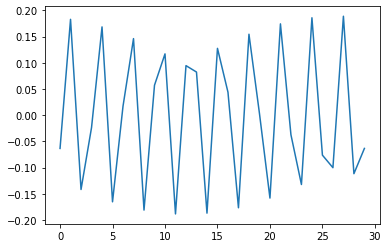

In [85]:
# variazion
i = np.array(list(range(len(Z))))
plt.plot( i , values)

$$
Z = \Phi^T Y
$$

La matriz a usar es
$$
Var(Y) = E[Y Y^T]
$$

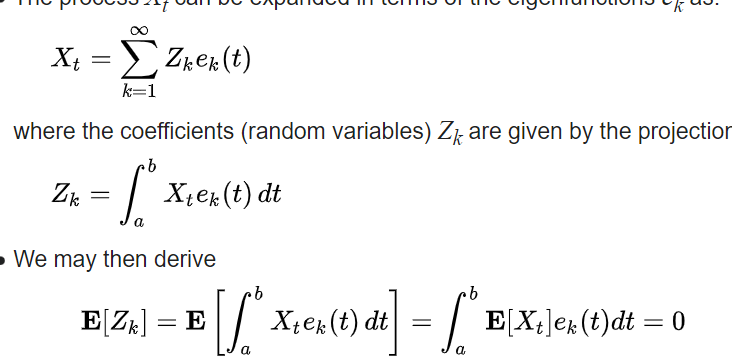

Long story short: The eigenvalues of the covariance matrix encode the variability of the data in an orthogonal basis that captures as much of the data's variability as possible in the first few basis functions (aka the principle component basis).

# Playground

In [ ]:

def KLT2(a):
    '''
    retorna 
    - el autovector de la matriz de covarianza de a
    - el autovalor de la matriz de covarianza de a
    '''
    # el vector columna
    ---

In [255]:
t = np.linspace(0,10, 300)
y = np.array([ np.sin(x) + 0.4*spawn(1)  for x in t ])


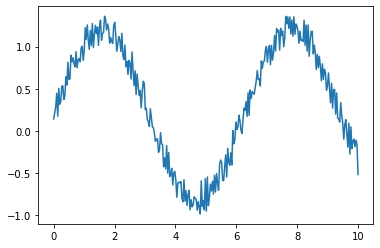

In [256]:
plt.plot(t,y)

In [258]:

# el vector columna
Y = y[:,np.newaxis]
# el transpuesto
YT = y[np.newaxis, :]

eigenval, eigenvec = np.linalg.eig( np.cov(Y @ YT) )

z = np.array([np.dot(eigenvec[:,tt], y) for tt in range( eigenvec.shape[0] ) ])

$$
Y_i = \sum^N Z_j e_j(i)
$$

In [259]:
Y_recons = np.zeros( eigenvec.shape[0] , dtype=np.complex_)

for tt in range(eigenvec.shape[0]):
    sum = 0.0
    for i in range(eigenvec.shape[1]):
        sum += z[i] * eigenvec[tt,i]
    Y_recons[tt] = sum

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


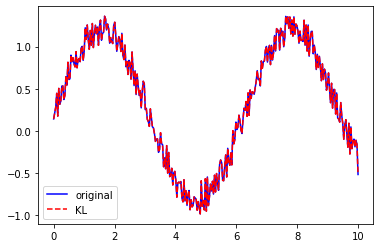

In [260]:
plt.plot(t, y, 'b',label='original')
plt.plot(t, Y_recons, 'r--',label='KL')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Magnitud de Coeficientes')

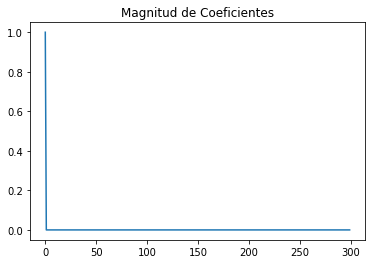

In [264]:
plt.plot(abs(z)/np.max(abs(z)))
plt.title('Magnitud de Coeficientes')

$$
Y_i = \sum^3 Z_j e_j(i)
$$

Los primeros 5 componentes

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


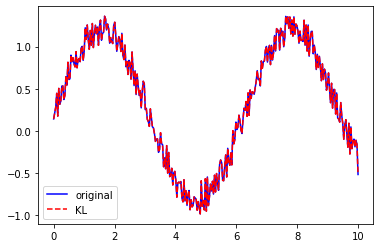

In [265]:
N = eigenvec.shape[0]
Y_recons2 = np.zeros( eigenvec.shape[0] , dtype=np.complex_)

for tt in range(eigenvec.shape[0]):
    sum = 0.0
    for i in range(4):
        sum += z[i] * eigenvec[tt,i]
    Y_recons2[tt] = sum

plt.plot(t, y, 'b',label='original')
plt.plot(t, Y_recons2, 'r--',label='KL')
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


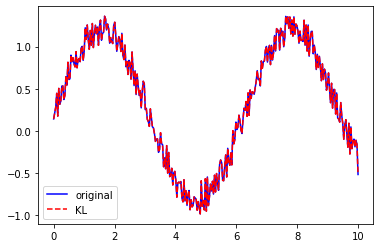

In [266]:
#un solo componente
Y_recons2 = np.zeros( eigenvec.shape[0] , dtype=np.complex_)

for tt in range(eigenvec.shape[0]):
    sum = 0.0

    sum += z[0] * eigenvec[tt,0]
    Y_recons2[tt] = sum

plt.plot(t, y, 'b',label='original')
plt.plot(t, Y_recons2, 'r--',label='KL')
plt.legend()
plt.show()

# Animacion

In [267]:
# aumentamos la cantidad de parametros
N = eigenvec.shape[0]
for n in range(10, N):
    Y_recons2 = np.zeros( eigenvec.shape[0] , dtype=np.complex_)

    for tt in range(eigenvec.shape[0]):
        sum = 0.0
        for i in range(n):
            sum += z[i] * eigenvec[tt,i]
        Y_recons2[tt] = sum

    plt.plot(t, y, 'b',label='original')
    plt.plot(t, Y_recons2.real, 'r--',label='KL')
    plt.legend()
    plt.savefig(f'plots/{str(n).zfill(4)}.png')
    plt.ioff()
    plt.close()

In [272]:
# disminuimos los parametros
N = eigenvec.shape[0]
counter = 0
for n in list(range(10, N))[::-1]:
    Y_recons2 = np.zeros( eigenvec.shape[0] , dtype=np.complex_)

    for tt in range(eigenvec.shape[0]):
        sum = 0.0
        for i in range(n):
            sum += z[i] * eigenvec[tt,i]
        Y_recons2[tt] = sum

    plt.plot(t, y, 'b',label='original')
    plt.plot(t, Y_recons2.real, 'r--',label='KL')
    plt.legend()
    plt.savefig(f'plotsinv/{str(counter).zfill(4)}.png')
    plt.ioff()
    plt.close()
    counter += 1

In [271]:
!rm aumentaN.mp4
!rm disminuyeN.mp4

rm: cannot remove 'disminuyeN.mp4': No such file or directory
ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp 

In [ ]:
!ffmpeg -r 10 -i 'plots/%04d.png' -pix_fmt yuv420p -qscale 1 aumentaN.mp4
!ffmpeg -r 10 -i 'plotsinv/%04d.png' -pix_fmt yuv420p -qscale 1 disminuyeN.mp4


In [ ]:
from google.colab import files

files.download('aumentaN.mp4')
files.download('disminuyeN.mp4')

In [189]:
def IKLT(z, eigenvec):
    
    Y_recons = np.zeros( eigenvec.shape[0] , dtype=np.complex_)

    for tt in range(eigenvec.shape[0]):
        sum = 0.0
        for i in range(len(z)):
            sum += z[i] * eigenvec[tt,i]
        Y_recons[tt] = sum
    return Y_recons

